# Clasificación de pacientes para diagnóstico de diabetes
## Laboratorio 1 - Clasificación

### 1. Importación de librerias

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)
import numpy as np
np.random.seed(3301)
import pandas as pd

# Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#para hacer balanceo de los features
from imblearn.over_sampling import SMOTE
# Para realizar la separaciond el conjunto de aprendizaje en entrenamiento y test
from sklearn.model_selection import train_test_split
#Importe del modelo
from sklearn.ensemble import RandomForestClassifier
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para busqueda de hiperparametros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold
#Librerias para la visualizacion
import matplotlib.pyplot as plt
#Seaborn
import seaborn as sns


### 2. Carga de los datos

In [2]:
#Debido a la existencia de valores no numericos debemos incluirlos como NaN. Esto se explica mas adelante
missing_values = ["-", 'Xx', '?']
df_diabetes = pd.read_csv('../Resources/202210_Laboratorio1_data_Datos_Clasificacion_2022.csv', sep=';', encoding='utf-8', index_col=0, dtype='unicode', na_values= missing_values)
df_diabetes.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
Diabetes_012,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,40,1,0,0,0,0,1,0,1,...,18,15,1,0,9,4,3,NaN,NaN,NaN,NaN,NaN
0.0,0,0,0,25,1,0,0,1,0,0,0,0,...,0,0,0,0,7,6,1,NaN,NaN,NaN,NaN,NaN
0.0,1,1,1,28,0,0,0,0,1,0,0,1,...,30,30,1,0,9,4,8,NaN,NaN,NaN,NaN,NaN
0.0,1,0,1,27,0,0,0,1,1,1,0,1,...,0,0,0,0,11,3,6,NaN,NaN,NaN,NaN,NaN
0.0,1,1,1,24,0,0,0,1,1,1,0,1,...,3,0,0,0,11,5,4,NaN,NaN,NaN,NaN,NaN


Si se utiliza el dtype int64 da error porque muchas columnas tienen valores de relleno invalidos ('Xx', '-', '?'). Debemos limpiarlos. Todas las columnas son de tipo int64. 

In [3]:
df_diabetes.isna().sum()

HighBP                      62
HighChol                    34
CholCheck                   46
BMI                         52
Smoker                      67
Stroke                      45
HeartDiseaseorAttack        46
PhysActivity                48
Fruits                      57
Veggies                     51
HvyAlcoholConsump           36
AnyHealthcare               44
NoDocbcCost                 54
GenHlth                     42
MentHlth                    46
PhysHlth                    67
DiffWalk                    48
Sex                         48
Age                         56
Education                   57
Income                      18
Unnamed: 22             100000
Unnamed: 23             100000
Unnamed: 24             100000
Unnamed: 25             100000
Unnamed: 26             100000
dtype: int64

### 3. Limpieza y prepracación de los datos

Vamos a eliminar las 5 columnas del final que parece son error del formato (el CSV tiene cada linea terminada en ';;;;;', siendo ';' el mismo caracter de terminación de las lineas.

In [4]:
df_diabetes = df_diabetes.iloc[:,:-5]
df_diabetes

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
0.0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
0.0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
0.0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
0.0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0,1,1,1,19,1,0,0,1,0,0,0,1,0,3,0,4,0,0,11,5,5
0.0,1,1,1,25,1,0,1,1,1,1,0,1,0,2,0,10,1,0,13,4,5
0.0,0,1,1,29,1,0,0,1,0,1,0,1,0,2,0,0,0,0,8,4,8


Sabiendo que existen valores NaN, vamos a ver la proporción que tienen y si los podemos remover sin problema.

<AxesSubplot:ylabel='Diabetes_012'>

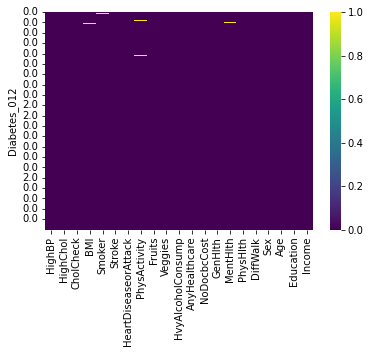

In [5]:
sns.heatmap(df_diabetes.isna(), cmap='viridis')

Es seguro quitar las filas con valores NaN. Ya que no representan una gran proporción de los datos.


In [6]:
df_diabetes = df_diabetes.dropna()

Ahora podremos ver los datos como numeros y su descripción.

In [7]:
df_diabetes = df_diabetes.convert_dtypes()
df_diabetes.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,98988,98988,98988,98988,98988,98988,98988,98988,98988,98988,98988,98988,98988,98988,98988,98988,98988,98988,98988,98988,98988
unique,2,2,2,92,2,2,2,2,2,2,2,2,2,5,46,51,2,2,13,6,8
top,0,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,9,6,8
freq,56007,56244,95396,9545,54900,94896,89754,75420,63035,80685,93334,94086,90887,34734,67834,61929,82530,55603,12978,43412,36537


In [8]:
df_diabetes['Diabetes_012'] = df_diabetes.index
#Incluimos una de las particiones de los datos de una vez para evitar que se altere
df_diabetes = df_diabetes.dropna()
Y = df_diabetes['Diabetes_012']
df_diabetes.sample(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
Diabetes_012,,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,1,52,1,0,0,1,0,1,1,1,0,2,0,1,0,1,2,5,5,0.0
0.0,1,1,1,28,0,0,0,1,0,0,0,1,1,4,0,30,1,0,11,4,2,0.0
0.0,0,1,1,23,1,0,0,1,1,1,0,1,0,2,1,0,0,0,8,5,8,0.0
0.0,0,0,1,29,0,0,0,0,0,0,0,1,0,2,0,3,1,0,2,6,8,0.0
2.0,1,0,1,29,1,1,0,1,1,1,0,1,0,3,0,0,1,0,9,4,3,2.0


Ahora estandarizamos los datos.

In [9]:
std_scaler = StandardScaler()
df_std = pd.DataFrame(std_scaler.fit_transform(df_diabetes), columns=df_diabetes.columns)

Vamos a analizar el balanceo de los datos:

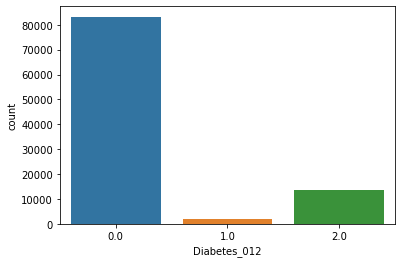

In [10]:
ax = sns.countplot(x='Diabetes_012', data=df_diabetes)

Observamos que hay un desbalanceo considerable de los datos, por esto usaremos SMOTE para contrarrestarlo.

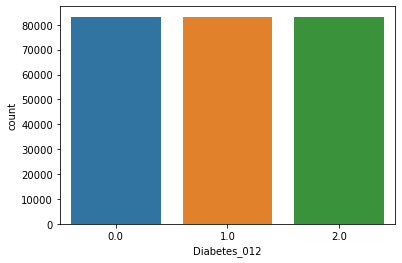

In [11]:
diabCol = df_std
df_std = df_std.drop(['Diabetes_012'], axis=1)
# transform the dataset
oversample = SMOTE()
df_std, Y = oversample.fit_resample(df_std, Y)
df_std['Diabetes_012'] = Y
ax = sns.countplot(x='Diabetes_012', data=df_std)
df_std = df_std.drop(['Diabetes_012'], axis=1)

Finalmente utilizamos el metodo de filtro de Pearson para ver las etiquetas mas importantes.

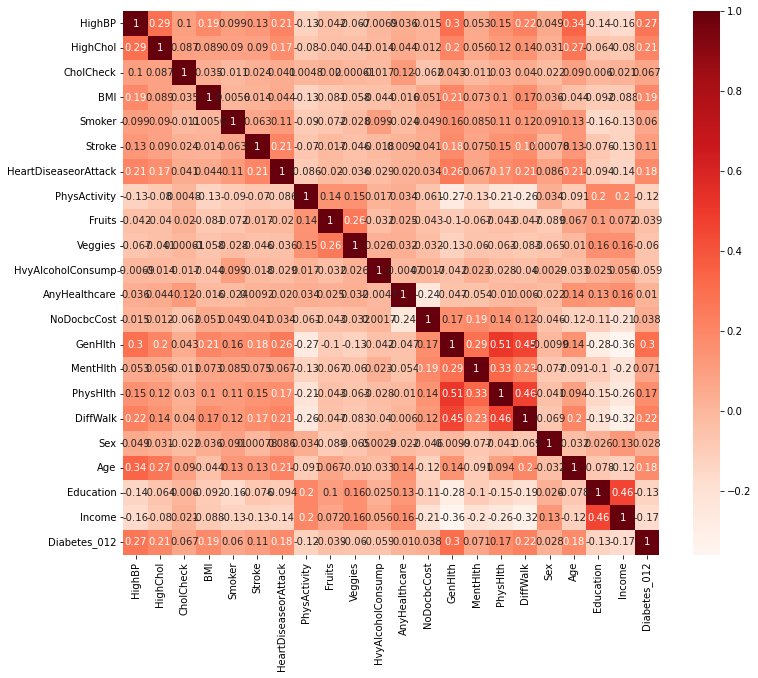

In [12]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = diabCol.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
#Correlation with output variable
cor_target = abs(cor["Diabetes_012"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features = relevant_features.iloc[:-1]
print(relevant_features)

HighBP                  0.271408
HighChol                0.207294
BMI                     0.190217
Stroke                  0.106665
HeartDiseaseorAttack    0.182025
PhysActivity            0.121123
GenHlth                 0.299764
PhysHlth                0.169162
DiffWalk                0.222965
Age                     0.178475
Education               0.129937
Income                  0.166849
Name: Diabetes_012, dtype: float64


Ahora se procede a dejar solamente estas columnas en el DataFrame. Con esto nos aseguramos que el modelo se mantenga enfocado en las relaciones de etiquetas importantes.

In [14]:
df_std = df_std[relevant_features.index]
df_std.sample(5)

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
125893,-0.876006,1.146962,-0.138847,-0.207663,-0.32083,0.559134,-0.234749,-0.386287,-0.446549,-0.690798,-0.078708,0.071821
111862,-0.876006,-0.045629,-0.265935,-0.207663,-0.32083,0.559134,0.464707,-0.195126,2.239396,1.283767,-1.094330,-1.131768
105084,1.141545,-0.871868,7.298869,-0.207663,-0.32083,0.559134,-0.470616,-0.469995,-0.446549,-0.234097,-1.561874,0.026400
94095,1.141545,-0.871868,-0.301557,-0.207663,-0.32083,0.559134,-1.405940,-0.469995,-0.446549,0.626533,0.936915,0.920078
10685,1.141545,1.146962,0.737975,-0.207663,-0.32083,0.559134,0.464707,-0.469995,-0.446549,-0.030702,-1.094330,-2.477179


### 4. Entrenamiento del modelo RBF SVM

In [15]:
# Nuestra variable objetivo ya la guardamos anteriormente
# Del conjunto de datos se elimina la variable "Popularity_label"
X = df_std
X = X.astype('float16')
Y = Y.dropna()
Y = Y.astype('float16')

In [16]:
#Hacemos la division del dataset en training y en validation subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 18)

#### Random forest classifier
Utilizamos RFS con un grid que contiene los posibles valores de los hiperparametros del modelo.

In [17]:
param_grid = {
    'criterion': ['gini','entropy'],
    'bootstrap': [True, False],
    'max_features': ['auto','sqrt','log2']    ,
}
particiones = KFold(n_splits=10, shuffle=True, random_state = 123)
model = RandomForestClassifier(n_jobs=8, n_estimators=100)
mejor_modelo = GridSearchCV(model, param_grid, cv=particiones)
# Fit on training data
mejor_modelo.fit(X_train, Y_train)
mejor_modelo.best_params_
arbol_final = mejor_modelo.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


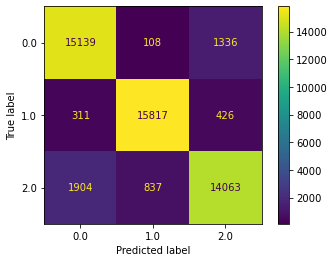

In [18]:
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol_final, X_test, Y_test)  
plt.show()


In [19]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     16583
         1.0       0.94      0.96      0.95     16554
         2.0       0.89      0.84      0.86     16804

    accuracy                           0.90     49941
   macro avg       0.90      0.90      0.90     49941
weighted avg       0.90      0.90      0.90     49941

